# <font color='lightblue'> Preprocessinges

## <font color='Orange'> Import liblaries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
warnings.filterwarnings('ignore')
sns.set_style(style='darkgrid')

## <font color='Orange'> Read data & information about it

In [3]:
data = pd.read_csv('Heart Attack.csv')
data

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [4]:
data.dtypes

age                int64
gender             int64
impluse            int64
pressurehight      int64
pressurelow        int64
glucose          float64
kcm              float64
troponin         float64
class             object
dtype: object

In [5]:
data.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


## <font color='Orange'> Plotts

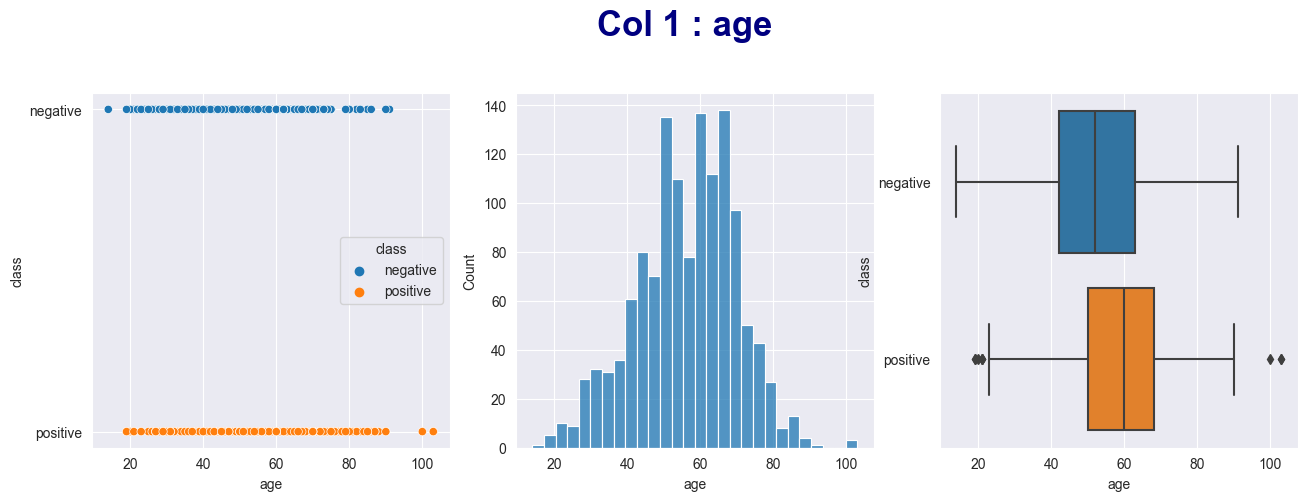

In [6]:
# col1 : age
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Col 1 : age', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)
# ax1
sns.scatterplot(data=data, x='age', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=data, x='age', ax=axes[1])

# ax3
sns.boxplot(data=data, x='age', y='class', ax=axes[2])

plt.show()

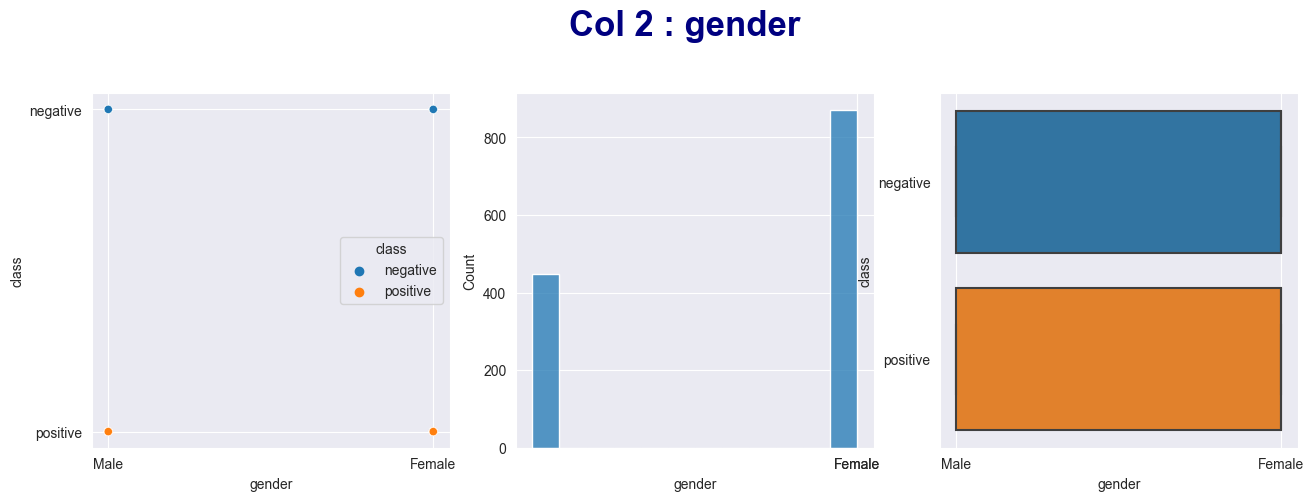

In [7]:
# col2 : gender
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Col 2 : gender', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=data, x='gender', y='class', ax=axes[0], hue='class')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(np.array(['Male', 'Female']))

# ax2
sns.histplot(data=data, x='gender', ax=axes[1])
axes[1].set_xticks([1, 1])
axes[1].set_xticklabels(np.array(['Male', 'Female']))

# ax3
sns.boxplot(data=data, x='gender', y='class', ax=axes[2])
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(np.array(['Male', 'Female']))

plt.show()

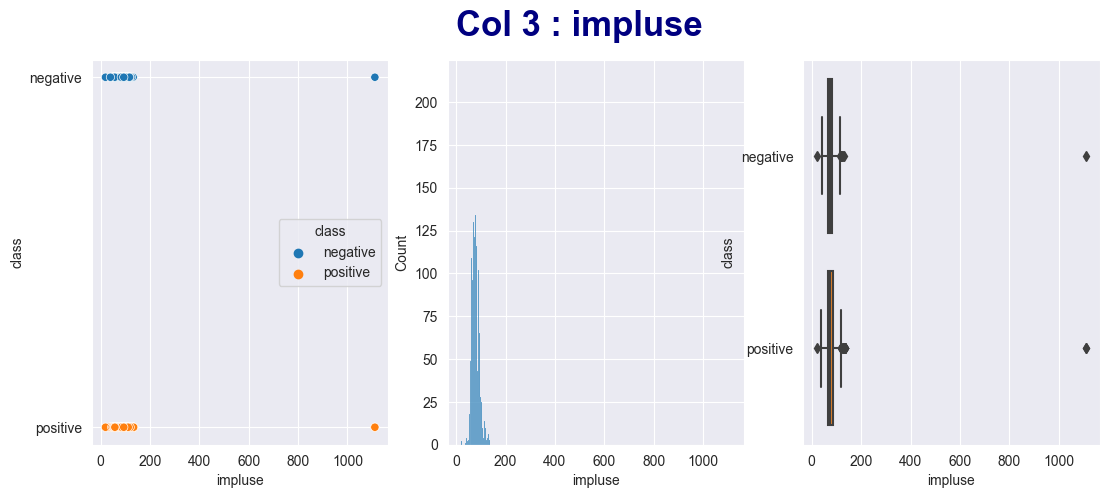

In [8]:
# Col3 : impluse
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Col 3 : impluse', fontsize=25, fontweight='bold', color='navy')

# ax1
sns.scatterplot(data=data, x='impluse', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=data, x='impluse', ax=axes[1])

# ax3
sns.boxplot(data=data, x='impluse', y='class', ax=axes[2])

plt.show()

data.implus>1000 should be check

In [9]:
data[data.impluse>1000]

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
63,45,1,1111,141,95,109.0,1.33,1.010,positive
717,70,0,1111,141,95,138.0,3.87,0.028,positive
1069,32,0,1111,141,95,82.0,2.66,0.008,negative


its may be noises

In [10]:
condition = data.impluse<1000
data2 = data[condition]

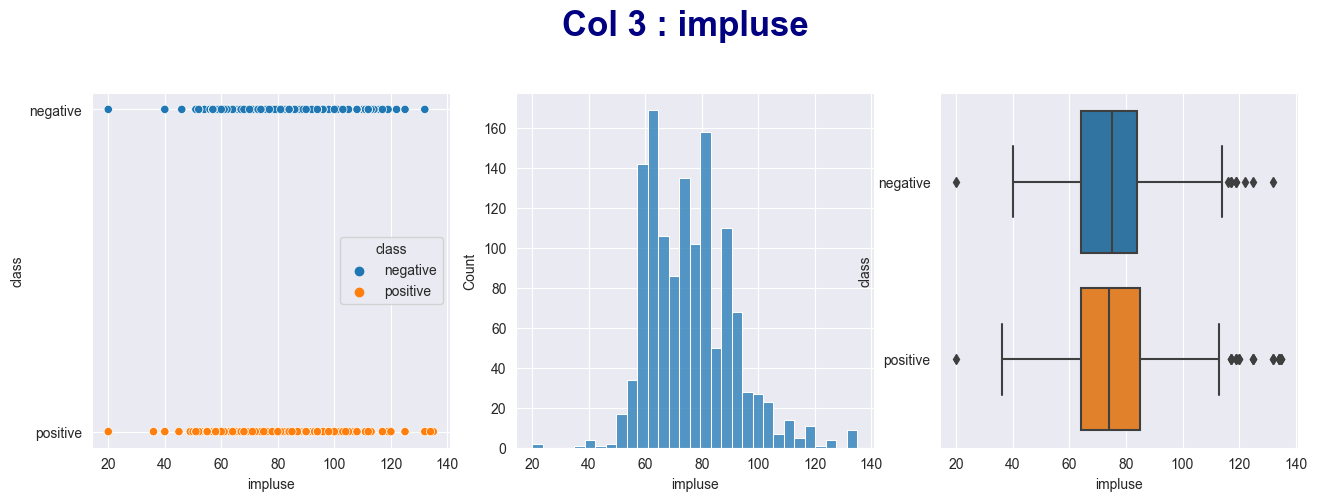

In [11]:
# Col3 : impluse
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Col 3 : impluse', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=data2, x='impluse', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=data2, x='impluse', ax=axes[1])

# ax3
sns.boxplot(data=data2, x='impluse', y='class', ax=axes[2])

plt.show()

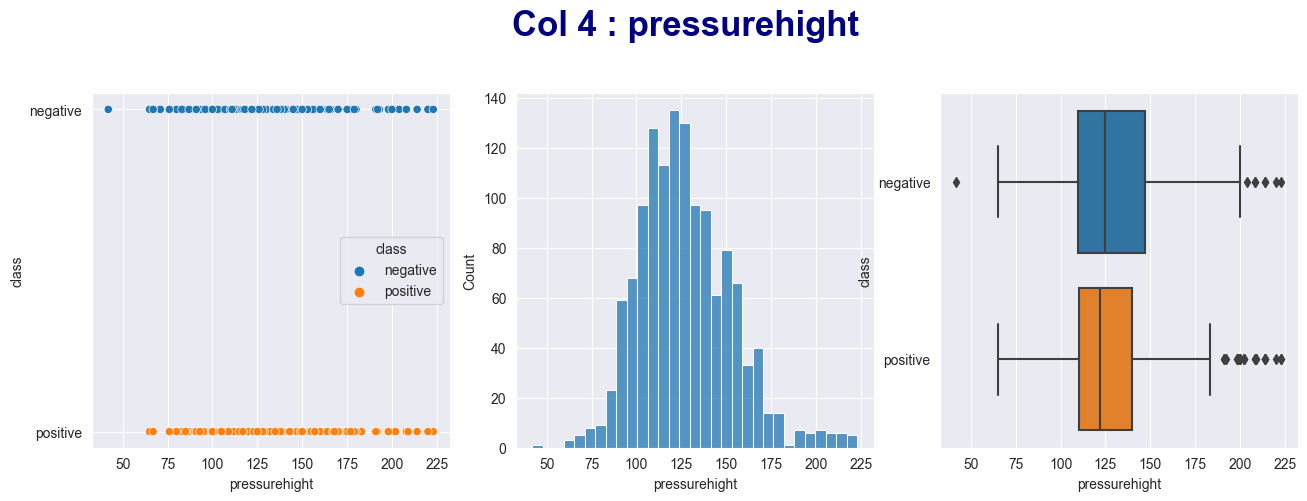

In [12]:
# Col4 : pressurehight
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Col 4 : pressurehight', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=data2, x='pressurehight', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=data2, x='pressurehight', ax=axes[1])

# ax3
sns.boxplot(data=data2, x='pressurehight', y='class', ax=axes[2])

plt.show()

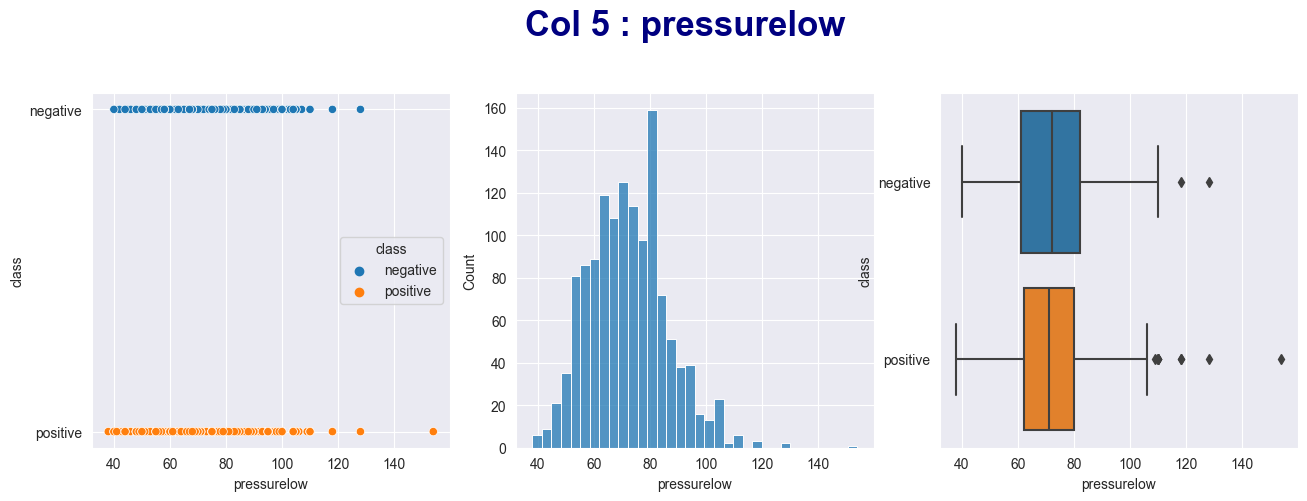

In [13]:
# Col5 : pressurelow
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Col 5 : pressurelow', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=data2, x='pressurelow', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=data2, x='pressurelow', ax=axes[1])

# ax3
sns.boxplot(data=data2, x='pressurelow', y='class')
plt.show()

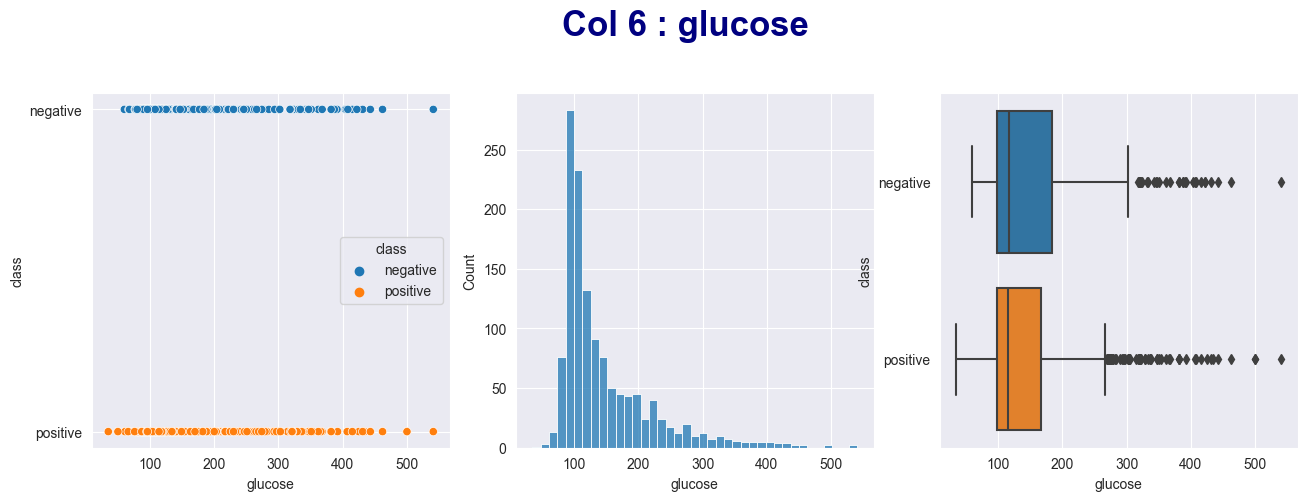

In [14]:
# Col6 : glucose
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Col 6 : glucose', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=data2, x='glucose', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=data2, x='glucose', ax=axes[1])

# ax3
sns.boxplot(data=data2, x='glucose', y='class')
plt.show()

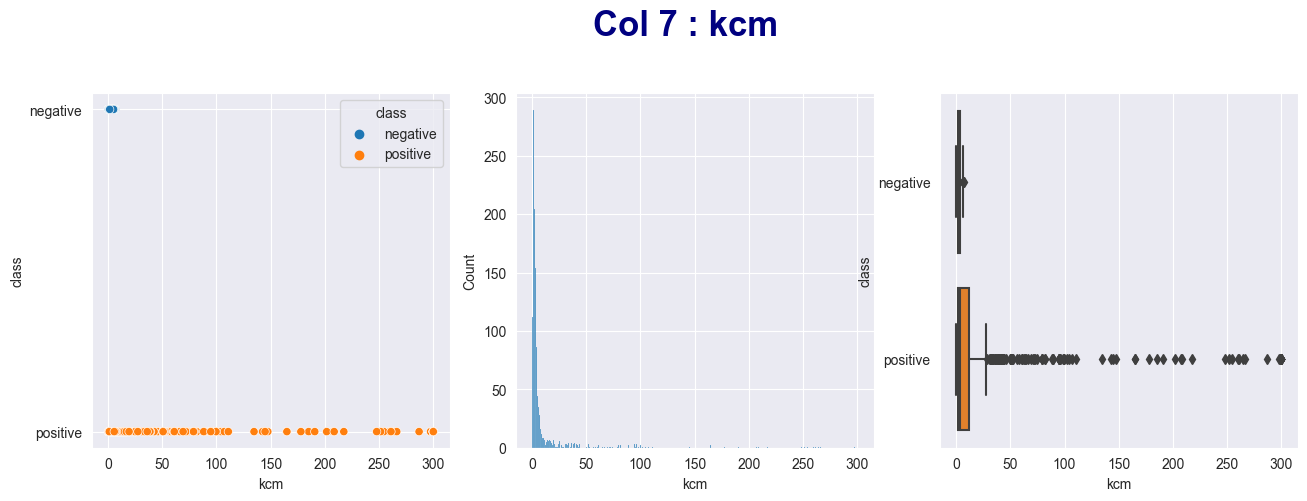

In [15]:
# Col6 : kcm
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Col 7 : kcm', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=data2, x='kcm', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=data2, x='kcm', ax=axes[1])

# ax3
sns.boxplot(data=data2, x='kcm', y='class')
plt.show()

if kcm > 10 then Heart Attack is Posible

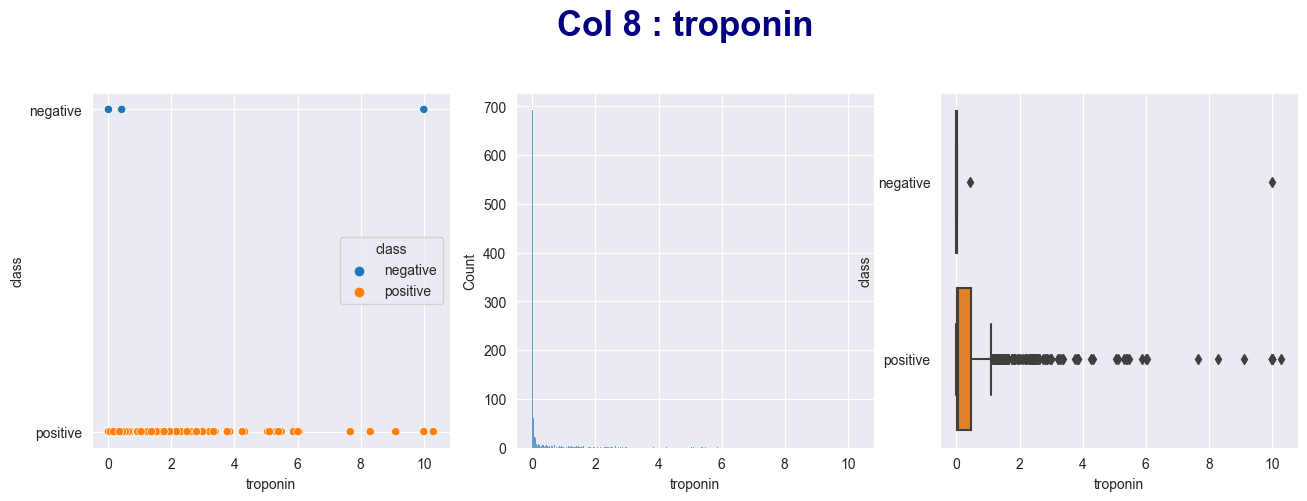

In [16]:
# Col6 : troponin
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Col 8 : troponin', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=data2, x='troponin', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=data2, x='troponin', ax=axes[1])

# ax3
sns.boxplot(data=data2, x='troponin', y='class')
plt.show()

Points for class=negative and troponin=10 must be check

In [17]:
d1 = data2['class']=='negative'
d11 = data2[d1]

d2 = d11.troponin > 9
d22 = d11[d2]

d22

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
29,63,1,66,135,55,166.0,0.493,10.0,negative


In [18]:
data2[data2.troponin==10.0][data2['class']=='negative']

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
29,63,1,66,135,55,166.0,0.493,10.0,negative


i think its a nois, so remove it

In [19]:
data2.drop(index=29, inplace=True)
data2.reset_index(drop=True, inplace=True)

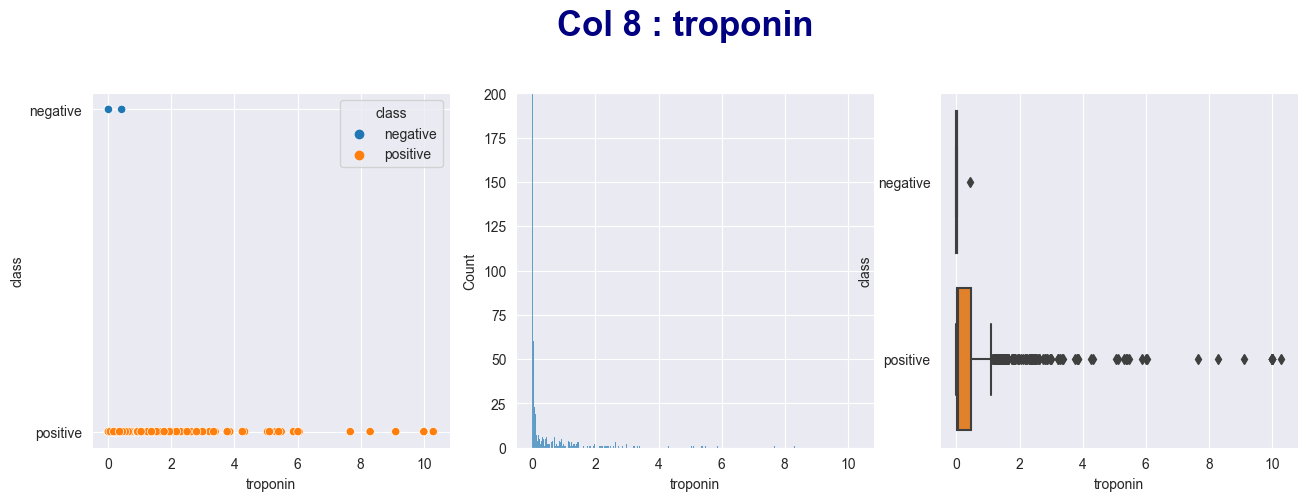

In [20]:
# Col6 : troponin
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Col 8 : troponin', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=data2, x='troponin', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=data2, x='troponin', ax=axes[1])
axes[1].set_ylim([0, 200])

# ax3
sns.boxplot(data=data2, x='troponin', y='class')
plt.show()

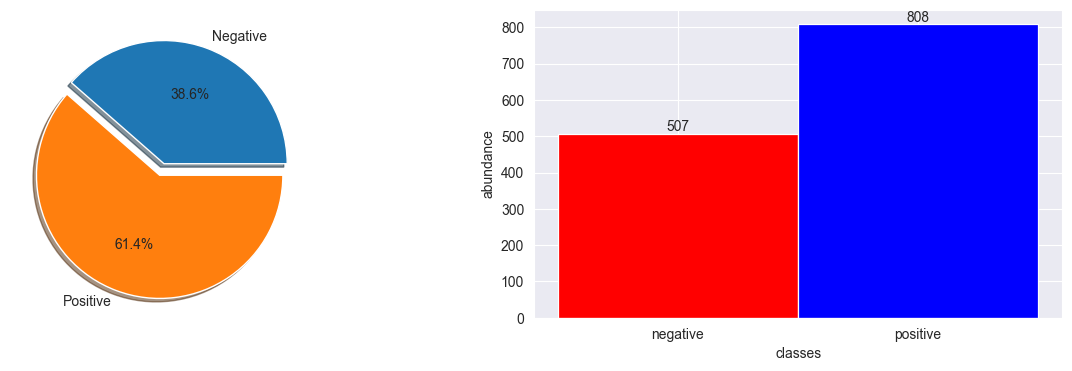

In [21]:
# Target
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
# ax1
d = data2[['class']]
d = d.groupby('class').size()
labels = ['Negative', 'Positive']
explode = (0, 0.1)
axes[0].pie(d, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True)

# ax 2
c = ['red', 'blue']
x = data2['class'].value_counts().sort_values().index
y = data2['class'].value_counts().sort_values()
bar_container = axes[1].bar(x, y, color=c, width=1, edgecolor="white", linewidth=0.9)
axes[1].bar_label(bar_container)
axes[1].set(xlabel='classes', ylabel='abundance', xticks=np.arange(0, 1.5))
plt.show()

# <font color='lightblue'> Modeling

In [22]:
X = data2.drop(columns='class')
y = data2['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('Shape of X_Train set : {}'.format(X_train.shape))
print('Shape of y_Train set : {}'.format(y_train.shape))
print('_'*50)
print('Shape of X_test set : {}'.format(X_test.shape))
print('Shape of y_test set : {}'.format(y_test.shape))

Shape of X_Train set : (1052, 8)
Shape of y_Train set : (1052,)
__________________________________________________
Shape of X_test set : (263, 8)
Shape of y_test set : (263,)


## <font color='orange'> DecisionTreeClassifier

In [23]:
# Find best parameters for DTs

criterions = ['gini', 'entropy', 'log_loss']
best_criterion = str()
splitters = ['best', 'random']
best_splitter = str()
max_depthes = [None, 3, 4, 5, 6, 7, 8, 9]
best_depth = int()
best_acc = 0

for criterion in criterions :
    for splitter in splitters :
        for depth in max_depthes :
            # Modeling
            DTs = DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=depth, random_state=0)
            DTs.fit(X_train, y_train)
            y_pred = DTs.predict(X_test)
            # Score
            score = accuracy_score(y_test, y_pred)
            # Condition to find best parameters
            if (score > best_acc) and (score < 0.98) :
                best_acc = score
                best_criterion = criterion
                best_splitter = splitter
                best_depth = depth
            else :
                continue
print('Best Criterion : ', best_criterion)
print('Best splitter : ', best_splitter)
print('Best depth : ', best_depth)
print('Accuracy Score : ', best_acc)

Best Criterion :  gini
Best splitter :  random
Best depth :  7
Accuracy Score :  0.9505703422053232


In [24]:
# Final DTs Model with best parameters
DTs = DecisionTreeClassifier(criterion=best_criterion, splitter=best_splitter, max_depth=best_depth, random_state=0)
DTs.fit(X_train, y_train)
y_pred = DTs.predict(X_test)
# Score
DTs_score = accuracy_score(y_test, y_pred)
DTs_score

0.9505703422053232

### <font color='cyan'> DTs is optimized DecisionTreeClassifier, Score = 0.95

## <font color='orange'> Random Forest

In [25]:
# Find best parameters for Random Forest

n_estimators = [10, 50, 100, 250, 500]
criterions = ['gini', 'entropy']
max_depthes = [None, 2,  4, 6, 8]
best_acc = 0.0001

for estimator in n_estimators :
    for criterion in criterions :
        for depth in max_depthes :

            # Modeling
            RF = RandomForestClassifier(n_estimators=estimator, criterion=criterion, 
                                        max_depth=depth, n_jobs=-1)
            RF.fit(X_train, y_train)
            y_pred = RF.predict(X_test)
            # Score
            score = accuracy_score(y_test, y_pred)
            # Condition to find best parameters
            if (score > best_acc) and (score < 0.98): # Condition to avoide overfitting
                best_acc = score
                best_estimator = estimator
                best_criterion = criterion
                best_depth = depth

print('Best Criterion : ', best_criterion)
print('Best estimator : ', best_estimator)
print('Best depth : ', best_depth)
print('Accuracy Score : ', best_acc)

Best Criterion :  entropy
Best estimator :  10
Best depth :  2
Accuracy Score :  0.7832699619771863


In [26]:
RF = RandomForestClassifier(n_estimators=best_estimator, criterion=best_criterion, max_depth=best_depth, 
                            n_jobs=-1, random_state=0)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

RF_score = accuracy_score(y_test, y_pred)
RF_score

0.9695817490494296

### <font color='cyan'> RF is optimized DecisionTreeClassifier, Score = 0.977

## <font color='orange'> KNeighborsClassifier

In [31]:
# Find best parameters for KNeighborsClassifier
best_acc = 0

for k in range(3, 15, 2) :
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1).fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    if score > best_acc :
        best_acc = score
        best_k = k
print('Best k :', best_k)
print('score : ', best_acc)

Best k : 13
score :  0.6387832699619772


In [32]:
knn = knn = KNeighborsClassifier(n_neighbors=13, n_jobs=-1).fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_score = accuracy_score(y_test, y_pred)
print(knn_score)

0.6387832699619772


### <font color='cyan'> knn is optimized DecisionTreeClassifier, Score = 0.639

# <font color='yellow'> Conclution :

In [40]:
result = pd.DataFrame({
    'Algorithms': ['DTs', 'RF', 'knn'],
    'Accuracy' : [DTs_score, RF_score, knn_score]
})

result

,Algorithms,Accuracy
0,DTs,0.950570
1,RF,0.969582
2,knn,0.638783
